# ERC-4626: all vaults on Arbitrum

- In this notebook, we examine ERC-4626 vaults on a particular chain

## Usage

This is an open source notebook based on open data
- You can edit and remix this notebook yourself 

To do your own data research:

- Read general instructions [how to run the tutorials](./)
- See `ERC-4626: scanning vaults' historical price and performance` example in tutorials first how to build `vault-prices-1h.parquet` file.

For any questions, follow and contact [Trading Strategy community](https://tradingstrategy.ai/community).

## Setup

- Set up notebook rendering output mode
- Use static image charts so this notebook is readeable on Github / ReadTheDocs

In [1]:
import pandas as pd
from plotly.offline import init_notebook_mode
import plotly.io as pio

from eth_defi.vault.base import VaultSpec
from eth_defi.research.notebook import set_large_plotly_chart_font

# Fix X time axis bugs in Plotly charts
from eth_defi.monkeypatch import plotly

pd.options.display.float_format = "{:,.2f}".format
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Set up Plotly chart output as SVG
image_format = "png"
width = 1400
height = 800

# https://stackoverflow.com/a/52956402/315168
init_notebook_mode()

# https://plotly.com/python/renderers/#overriding-the-default-renderer
pio.renderers.default = image_format

current_renderer = pio.renderers[image_format]
# Have SVGs default pixel with
current_renderer.width = width
current_renderer.height = height

# Set all Plotly charts to use large font sizes for better readability,
# for sharing on mobile
set_large_plotly_chart_font(line_width=5, legend_font_size=16)
pio.templates.default = "custom"

## Read and clean raw scanned vault price data

- Read the Parquet file produced earlier with price scan 
- Clean the data if necessary

In [2]:
import pickle
from pathlib import Path

from eth_defi.vault.vaultdb import VaultDatabase

data_folder = Path("~/.tradingstrategy/vaults").expanduser()

vault_db = VaultDatabase.read()

cleaned_data_parquet_file = data_folder / "cleaned-vault-prices-1h.parquet"
prices_df = pd.read_parquet(cleaned_data_parquet_file)

print(f"We have {len(vault_db):,} vaults in the database and {len(prices_df):,} price rows.")

We have 25,646 vaults in the database and 5,883,215 price rows.


## Choose chain to examine

- [See ChainList.org](https://chainlist.org/)

In [3]:
from eth_defi.vault.base import VaultSpec
from eth_defi.chain import get_chain_name

selected_chain_id = 42161  # Arbitrum
# selected_chain_id = 1  # Ethereum Mainnet
chain_name = get_chain_name(selected_chain_id)

print(f"Examining chain {chain_name} ({selected_chain_id})")


Examining chain Arbitrum (42161)


## Price data filtering

- Filter rices for our chains only

In [4]:

# last_sample_at = prices_df.index[-1]
# one_month_ago = last_sample_at - pd.DateOffset(months=1)

# PERIOD = [
#    one_month_ago,
#    last_sample_at,
#]
#
# mask = (prices_df.index >= PERIOD[0]) & (prices_df.index <= PERIOD[1])
prices_df = prices_df[prices_df["chain"] == selected_chain_id]
print(f"Examined prices contain {len(prices_df):,} price rows across all vaults on {chain_name}.")

prices_df.head(4)

Examined prices contain 376,996 price rows across all vaults on Arbitrum.


id  chain  \
timestamp                                                                      
2025-08-20 10:45:30  42161-0x000a70c4887cc3974de7535623209ca01a215c50  42161   
2025-08-27 14:29:29  42161-0x000a70c4887cc3974de7535623209ca01a215c50  42161   
2025-12-10 19:39:45  42161-0x000a70c4887cc3974de7535623209ca01a215c50  42161   
2024-01-11 09:13:06  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776  42161   

                                                        address  block_number  \
timestamp                                                                       
2025-08-20 10:45:30  0x000a70c4887cc3974de7535623209ca01a215c50     370385921   
2025-08-27 14:29:29  0x000a70c4887cc3974de7535623209ca01a215c50     372862721   
2025-12-10 19:39:45  0x000a70c4887cc3974de7535623209ca01a215c50     409265921   
2024-01-11 09:13:06  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776     169318721   

                     share_price  total_assets  total_supply  performance_fee  \
timestamp                                                                       
2025-08-20 10:45:30         1.00          1.33          1.33              NaN   
2025-08-27 14:29:29         1.00          1.34          1.33              NaN   
2025-12-10 19:39:45         1.00          1.34          1.33              NaN   
2024-01-11 09:13:06         1.00          1.00          1.00              NaN   

                     management_fee errors                          name  \
timestamp                                                                  
2025-08-20 10:45:30             NaN         Harvest: USDC Vault (0x000A)   
2025-08-27 14:29:29             NaN         Harvest: USDC Vault (0x000A)   
2025-12-10 19:39:45             NaN         Harvest: USDC Vault (0x000A)   
2024-01-11 09:13:06             NaN         Staked USDA (Arbitrum) #6441   

                     event_count                       protocol  \
timestamp                                                         
2025-08-20 10:45:30            5                Harvest Finance   
2025-08-27 14:29:29            5                Harvest Finance   
2025-12-10 19:39:45            5                Harvest Finance   
2024-01-11 09:13:06       638815  <protocol not yet identified>   

                     raw_share_price  returns_1h  avg_assets_by_vault  \
timestamp                                                               
2025-08-20 10:45:30             1.00        0.00                 1.34   
2025-08-27 14:29:29             1.00        0.00                 1.34   
2025-12-10 19:39:45             1.00        0.00                 1.34   
2024-01-11 09:13:06             1.00        0.00           870,387.26   

                     dynamic_tvl_threshold  tvl_filtering_mask  
timestamp                                                       
2025-08-20 10:45:30                   0.03                True  
2025-08-27 14:29:29                   0.03                True  
2025-12-10 19:39:45                   0.03                True  
2024-01-11 09:13:06              17,407.75                True

## Filter vaults

- Choose vaults on our chain
- Filter out junk entries

In [5]:
min_tvl = 50_000

vault_db_chain = {spec: row for spec, row in vault_db.items() if spec.chain_id == selected_chain_id}
vault_db = {spec: row for spec, row in vault_db_chain.items() if (row["NAV"] or 0) >= min_tvl}
selected_vault_ids = {spec.as_string_id() for spec in vault_db.keys()}
prices_df = prices_df.loc[prices_df["id"].isin(selected_vault_ids)]

print(f"We have selectd {len(vault_db)} vaults out of total of {len(vault_db_chain):,} vaults on chain {chain_name}, having {len(prices_df):,} price rows.")

print("An example vault metadata:")
example_vault = next(iter(vault_db.values()))
display(pd.DataFrame(list(example_vault.items()), columns=["Key", "Value"]))

We have selectd 284 vaults out of total of 5,837 vaults on chain Arbitrum, having 119,714 price rows.
An example vault metadata:


Key                                              Value
0                Symbol                                             plvGLP
1                  Name                                   Plutus Vault GLP
2               Address         0x5326e71ff593ecc2cf7acae5fe57582d6e74cff1
3          Denomination                                             plsGLP
4           Share token                                             plvGLP
5                   NAV                          218852.566660400704649665
6              Protocol                      <protocol not yet identified>
7              Mgmt fee                                               None
8              Perf fee                                               None
9           Deposit fee                                               None
10         Withdraw fee                                               None
11               Shares                          157940.074220509572793378
12           First seen                                2022-08-26 11:27:33
13             Features                                                   
14                 Link  https://routescan.io/address/0x5326E71Ff593Ecc...
15      _detection_data  ERC4262VaultDetection(chain=42161, address='0x...
16  _denomination_token  {'name': 'Plutus Staked GLP', 'symbol': 'plsGL...
17         _share_token  {'name': 'Plutus Vault GLP', 'symbol': 'plvGLP...
18                _fees  FeeData(fee_mode=None, management=None, perfor...
19               _flags                                                 {}
20              _lockup                                               None

## Calculate vault lifetime metrics

- Calculate the DataFrame of life time metrics for each vault


In [6]:
from eth_defi.research.vault_metrics import calculate_lifetime_metrics, clean_lifetime_metrics
from eth_defi.research.vault_metrics import format_lifetime_table

lifetime_data_df = calculate_lifetime_metrics(
    prices_df,
    vault_db,
)

print(f"Cleaning metrics for {len(lifetime_data_df):,} vaults")
lifetime_data_df = clean_lifetime_metrics(
    lifetime_data_df,
    max_annualised_return=0.99,  # 99% max return
)

print(f"Calculated lifetime metrics for {len(lifetime_data_df):,} vaults")

lifetime_data_df = lifetime_data_df.sort_values(["one_month_cagr"], ascending=False)

display(lifetime_data_df.head(2))

Calculating vault performance metrics:   0%|          | 0/129 [00:00<?, ?it/s]

Cleaning metrics for 129 vaults
Vault entries with too high NAV values filtered out: 16
Vault entries with too small ATH NAV values filtered out: 1
Vaults abnormally high returns: 6
Vault entries with too few deposit and redeem events (min 25) filtered out: 4
Calculated lifetime metrics for 100 vaults


/Users/moo/code/trade-executor/deps/web3-ethereum-defi/.venv/lib/python3.12/site-packages/tqdm/std.py:917: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



name                vault_slug protocol_slug  \
116  Curve LLAMMA IBTC / crvUSD  curve-llamma-ibtc-crvusd        llamma   
41           Plutus Hedge Token        plutus-hedge-token        plutus   

     lifetime_return  lifetime_return_net  cagr  cagr_net  \
116             0.14                 0.14  0.10      0.10   
41              0.18                 0.18  0.22      0.22   

     three_months_returns  three_months_returns_net  three_months_cagr  \
116                  0.00                      0.00               0.00   
41                   0.04                      0.04               0.16   

     three_months_cagr_net  three_months_sharpe  three_months_sharpe_net  \
116                   0.00                 0.00                     0.00   
41                    0.16                 5.39                     5.39   

     three_months_volatility  one_month_returns  one_month_returns_net  \
116                     0.00               0.05                   0.05   
41                      0.09               0.02                   0.02   

     one_month_cagr  one_month_cagr_net denomination share_token     chain  \
116            0.73                0.73       crvUSD    cvcrvUSD  Arbitrum   
41             0.27                0.27         USDC    plvHedge  Arbitrum   

      peak_nav  current_nav  years  mgmt_fee  perf_fee  deposit_fee  \
116 407,182.92    62,603.56   1.31      0.00      0.00         0.00   
41  260,513.81   227,619.36   0.86      0.00      0.12         0.00   

     withdraw_fee                            fee_mode fee_internalised  \
116          0.00  VaultFeeMode.internalised_skimming             True   
41           0.00  VaultFeeMode.internalised_skimming             True   

                                            gross_fees  \
116  FeeData(fee_mode=<VaultFeeMode.internalised_sk...   
41   FeeData(fee_mode=<VaultFeeMode.internalised_sk...   

                                              net_fees        fee_label  \
116  FeeData(fee_mode=<VaultFeeMode.internalised_sk...          0% / 0%   
41   FeeData(fee_mode=<VaultFeeMode.internalised_sk...  0% / 12% (int.)   

     lockup  event_count protocol                            risk  \
116  0 days         1481   LLAMMA  VaultTechnicalRisk.blacklisted   
41  30 days          474   Plutus       VaultTechnicalRisk.severe   

     risk_numeric                                                id  \
116        999.00  42161-0xe296ee7f83d1d95b3f7827ff1d08fe1e4cf09d8d   
41          40.00  42161-0x58bfc95a864e18e8f3041d2fcd3418f48393fe6a   

             start_date            end_date  \
116 2024-08-19 17:01:50 2025-12-10 22:39:24   
41  2025-01-29 16:59:55 2025-12-10 07:41:42   

                                        address  chain_id  stablecoinish  \
116  0xe296ee7f83d1d95b3f7827ff1d08fe1e4cf09d8d     42161           True   
41   0x58bfc95a864e18e8f3041d2fcd3418f48393fe6a     42161           True   

        last_updated_at  last_updated_block       features flags  \
116 2025-12-10 22:39:24           409309121  [llamma_like]    {}   
41  2025-12-10 07:41:42           409093121  [plutus_like]    {}   

                                                 notes  \
116  Vault not actively listed on any known website...   
41                                                None   

                                                  link     one_month_start  \
116  https://routescan.io/address/0xe296eE7F83D1d95... 2025-11-10 16:27:52   
41                            https://plutus.fi/Vaults 2025-11-08 17:30:19   

          one_month_end  one_month_samples  three_months_start  \
116 2025-12-10 22:39:24              50.00 2025-04-25 01:32:40   
41  2025-12-10 07:41:42              24.00 2025-09-08 21:10:40   

       three_months_end  three_months_samples      lifetime_start  \
116 2025-12-10 22:39:24                    71 2024-08-19 17:01:50   
41  2025-12-10 07:41:42                    37 2025-01-29 16:59:55   

           lifetime_end  lifetime_samples  
116 2025-1

## Top vault list

- List top vaults on the chain, formatted for readability



In [7]:
from eth_defi.research.vault_metrics import format_lifetime_table

min_tvl = 25_000

lifetime_data_filtered_df = lifetime_data_df[lifetime_data_df["current_nav"] >= min_tvl]

lifetime_data_filtered_df = lifetime_data_filtered_df.sort_values(["one_month_cagr"], ascending=False)

print(f"Vaults filtered by min TVL of ${min_tvl:,}, remaining {len(lifetime_data_filtered_df):,} vaults.")
formatted_df = format_lifetime_table(
    lifetime_data_filtered_df,
    add_index=True,
    add_address=True,
)

print(f"Last update {lifetime_data_filtered_df['last_updated_at'].max()}")

cols_to_move = ['Name', '1M return ann. (net / gross)']
other_cols = [col for col in formatted_df.columns if col not in cols_to_move]
formatted_df = formatted_df[cols_to_move + other_cols]

print(f"Formatted data for {len(formatted_df):,} vaults.")

# Script output
max_address_dump = 300
head = formatted_df.head(max_address_dump)
vault_count = min(max_address_dump, len(head))
print(f"Top {vault_count} vaults by 1 month annualised return are: {', '.join(head['Name'])}")
print(f"Top {vault_count} vaults by 1 month annualised return are:\n{', '.join(head['Address'])}")

display(formatted_df)


Vaults filtered by min TVL of $25,000, remaining 99 vaults.
Last update 2025-12-10 23:39:22
Formatted data for 96 vaults.
Top 96 vaults by 1 month annualised return are: Plutus Hedge Token, Angmar Capital, Gravity Team LTD, Savings GYD, Curve LLAMMA asdCRV / crvUSD, USDC-2 yVault, Llamarisk crvUSD Vault, gmUSDC, gTrade (Gains Network USDC), Staked USDai, Yield Chasing Silo USDC, Tokemak arbUSD, Yield Chasing crvUSD, Hyperithm USDC, DAMM Stablecoin Fund, K3 Capital USDai USDC, Euler Theo USDC, Clearstar High Yield USDC, Yearn Degen USDC, Curve LLAMMA CRV / crvUSD, Clearstar USDC Reactor, Autopilot USDC Arbitrum, Borrowable USDC Deposit, SiloId: 145, Euler Earn USDC, MEV Capital USDC, Saving USX, Yield Chasing USDC, Gauntlet USDC Core, Spark USDC Vault, Euler Arbitrum Yield USDC, Dolomite: USDC, Steakhouse High Yield USDC, Revert Lend Arbitrum USDC,, Curve LLAMMA ARB / crvUSD, Edge UltraYield USDC, kpk USDC Yield, Staked USDA, Dolomite: USDT, Wrapped Aave Arbitrum GHO, Fluid Gho Token, E

Name 1M return ann. (net / gross)  \
#                                                                       
1                     Plutus Hedge Token                27.2% (27.2%)   
2                         Angmar Capital                13.8% (17.5%)   
3                       Gravity Team LTD                  --- (16.9%)   
4                            Savings GYD                  --- (15.0%)   
5           Curve LLAMMA asdCRV / crvUSD                14.2% (14.2%)   
6                          USDC-2 yVault                13.3% (13.3%)   
7                 Llamarisk crvUSD Vault                12.2% (13.0%)   
8                                 gmUSDC                 7.7% (12.0%)   
9            gTrade (Gains Network USDC)                10.2% (10.2%)   
10                          Staked USDai                  9.9% (9.9%)   
11               Yield Chasing Silo USDC                  8.2% (8.2%)   
12                        Tokemak arbUSD                  7.8% (7.8%)   
13                  Yield Chasing crvUSD                   --- (7.5%)   
14                        Hyperithm USDC                  7.1% (7.1%)   
15                  DAMM Stablecoin Fund                  5.5% (7.0%)   
16                 K3 Capital USDai USDC                  6.7% (6.7%)   
17                       Euler Theo USDC                  6.6% (6.6%)   
18             Clearstar High Yield USDC                  6.5% (6.5%)   
19                      Yearn Degen USDC                  6.5% (6.5%)   
20             Curve LLAMMA CRV / crvUSD                  6.3% (6.3%)   
21                Clearstar USDC Reactor                  5.7% (5.7%)   
22               Autopilot USDC Arbitrum                  5.0% (5.5%)   
23  Borrowable USDC Deposit, SiloId: 145                  5.4% (5.4%)   
24                       Euler Earn USDC                   --- (5.4%)   
25                      MEV Capital USDC                  5.3% (5.3%)   
26                            Saving USX                   --- (5.2%)   
27                    Yield Chasing USDC                  4.9% (4.9%)   
28                    Gauntlet USDC Core                  4.9% (4.9%)   
29                      Spark USDC Vault                   --- (4.6%)   
30             Euler Arbitrum Yield USDC                  4.5% (4.5%)   
31                        Dolomite: USDC                   --- (4.5%)   
32            Steakhouse High Yield USDC                  4.5% (4.5%)   
33            Revert Lend Arbitrum USDC,                   --- (4.5%)   
34             Curve LLAMMA ARB / crvUSD                  4.4% (4.4%)   
35                  Edge UltraYield USDC                  4.2% (4.2%)   
36                        kpk USDC Yield                  4.0% (4.0%)   
37                           Staked USDA                   --- (3.9%)   
38                        Dolomite: USDT                   --- (3.9%)   
39             Wrapped Aave Arbitrum GHO                   --- (3.5%)   
40                       Fluid Gho Token                   --- (3.4%)   
41                  Euler Arbitrum USDT0                  3.4% (3.4%)   
42                        Fluid USD Coin                   --- (3.3%)   
43            Curve LLAMMA WBTC / crvUSD                  2.9% (2.9%)   
44            Static Aave Arbitrum USDCn                   --- (2.9%)   
45           Wrapped Aave Arbitrum USDCn                   --- (2.9%)   
46                   Gauntlet USDC Prime                  2.7% (2.7%)   
47             Trust Wallet AAVE v3 USDC                   --- (2.6%)   
48      Crypto.com Defi Wallet AAVE USDC                   --- (2.5%)   
49             Static Aave Arbitrum USDT                   --- (2.5%)   
50            Wrapped Aave Arbitrum USDT                   --- (2.5%)   
51                      Fluid Tether USD                   --- (2.5%)   
52                   Euler Arbitrum USDC                  2.5% (2.5%)   
53  Crypto.com Defi Wallet Compound USDC                   --- (2.5%)   
54      Crypto.com De

## Top vault equity curve comparison

- Compare top vault equity curves 
- Compare net returns 
- Only vaults with fee data included
- Lookback 90 days


In [8]:
# Untangled Finance share price verification hack manual. verification
#
# from plotly import express as px

# # Looks like Untangled Finance has a real bug in onchain data
# # Block 389264321
# # Address 0x4a3f7dd63077cde8d7eff3c958eb69a3dd7d31a9
# # Vault share price drops 1.05 -> 0.44
# # Our share price cleaning cannot fix this big gab
# # https://www.tdly.co/shared/simulation/5428843e-3ac1-4f3a-acef-11d5d84acade
# df = prices_df.loc[prices_df.id == "42161-0x4a3f7dd63077cde8d7eff3c958eb69a3dd7d31a9"]
# df = df[pd.Timestamp("2025-10-13"):pd.Timestamp("2025-10-15")]
# # display(df)

# fig = px.line(
#     df,
#     x=df.index,
#     y="share_price",
#     title="Untangled Finance vault share price drop on Arbitrum",
# )
# fig.show()

# fig = px.line(
#     df,
#     x=df.index,
#     y="returns_1h",
#     title="Untangled Finance vault share price drop on Arbitrum",
# )
# fig.show()

Skipping vault 42161-0x1fe806928cf2dd6b917e10d3a8e7b631b4e4940c: Gravity Team LTD due to missing fee data
Skipping vault 42161-0xa7781f1d982eb9000bc1733e29ff5ba2824cdbe5: Yield Chasing crvUSD due to missing fee data
Skipping vault 42161-0xea50f402653c41cadbafd1f788341db7b7f37816: Savings GYD due to missing fee data


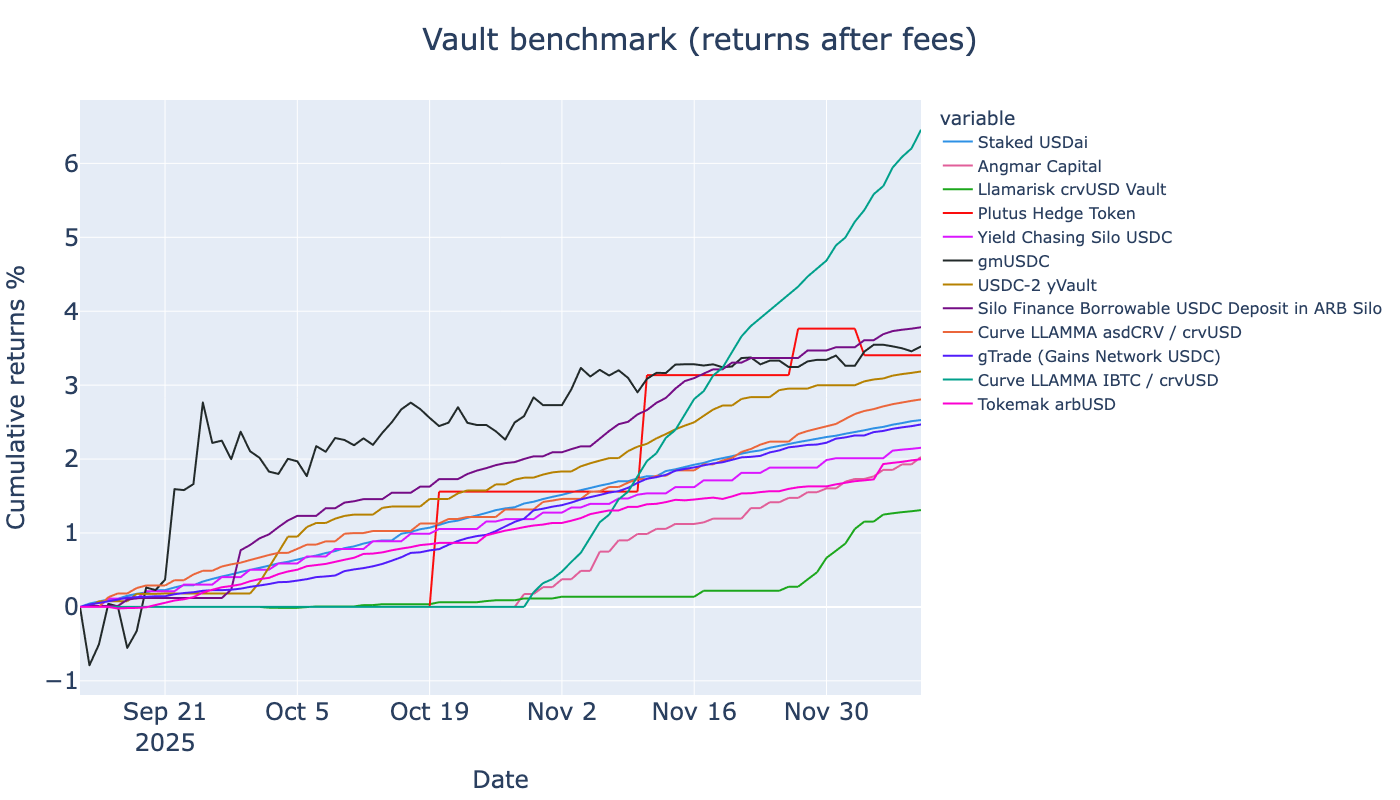

In [9]:
from eth_defi.research.vault_benchmark import visualise_vault_return_benchmark

top_count = 15

top_vaults_specs = lifetime_data_filtered_df.head(top_count)["id"].apply(VaultSpec.parse_string)

fig, net_returns_df = visualise_vault_return_benchmark(
    top_vaults_specs,
    prices_df=prices_df,
    vault_db=vault_db,
)

# display(net_returns_df)

fig.show()


## Top vaults correlation

- Check top vaults correlation matrix

In [10]:
# TODO

## Vault charts and performance tearsheets

- Show rolling returns performance chart for N top vaults

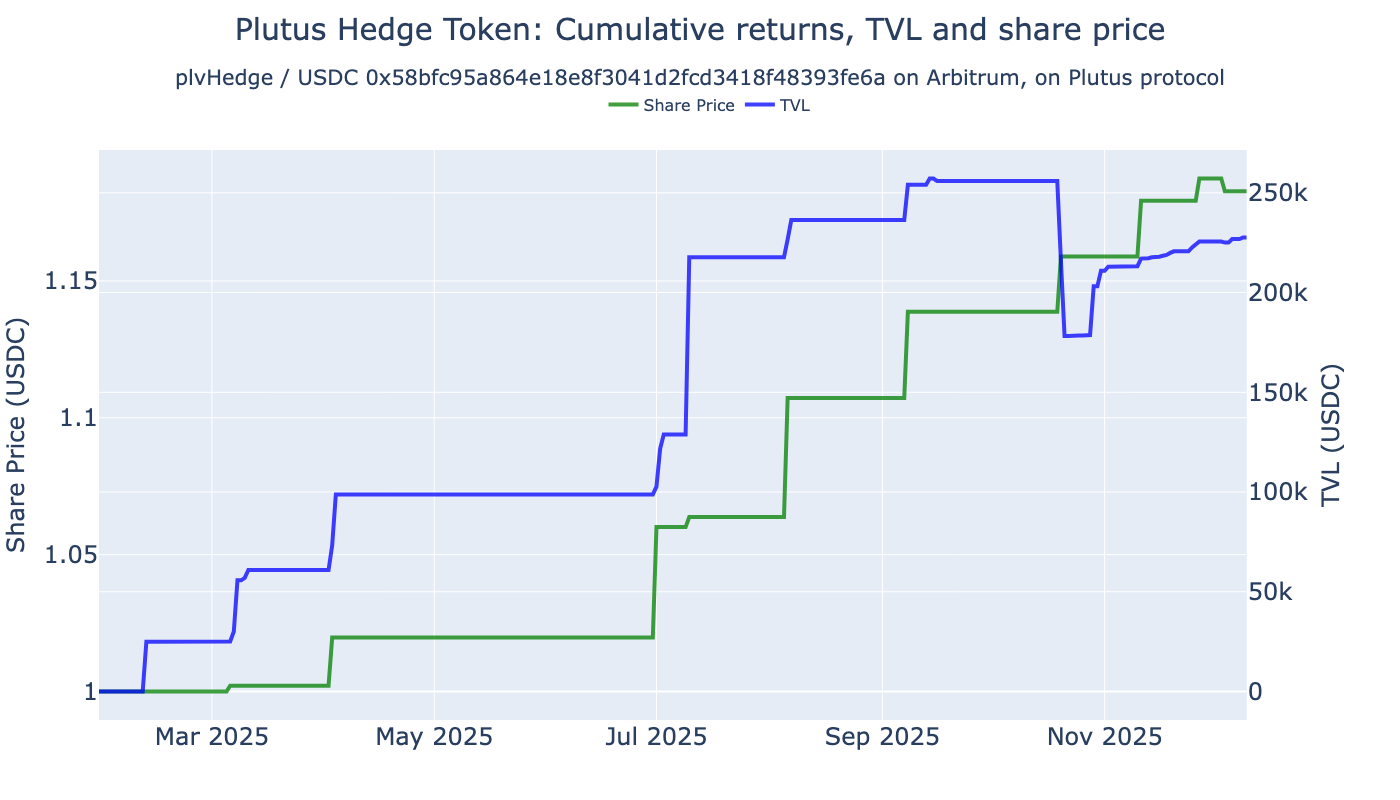

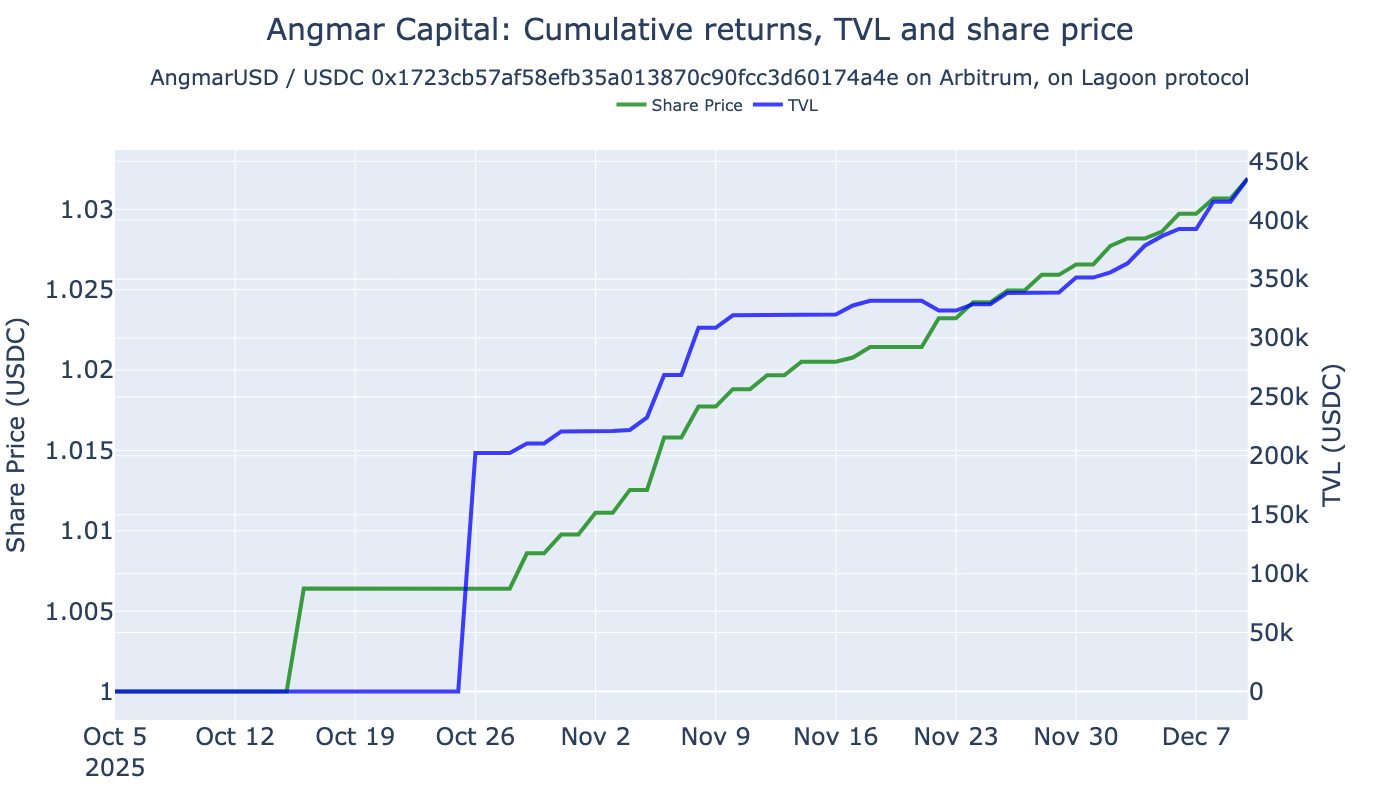

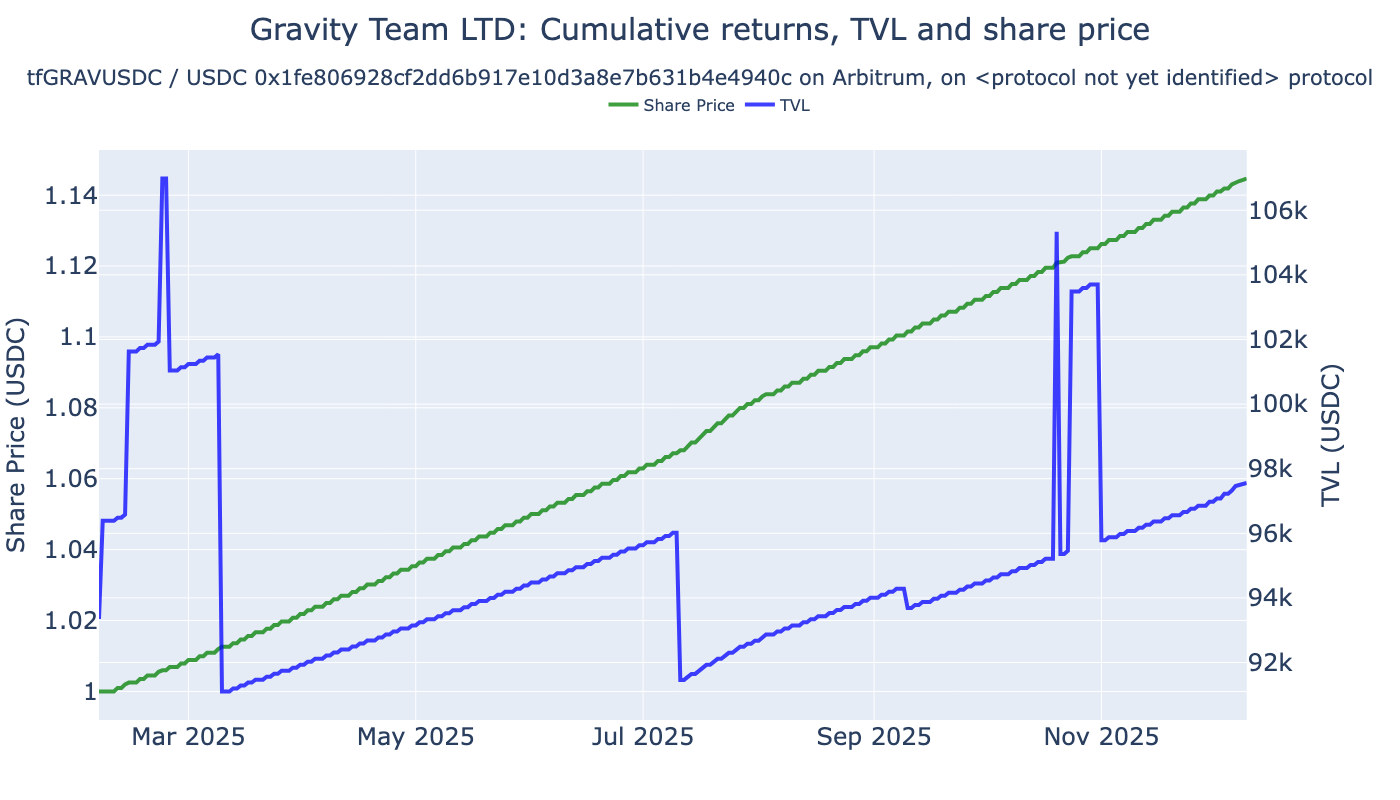

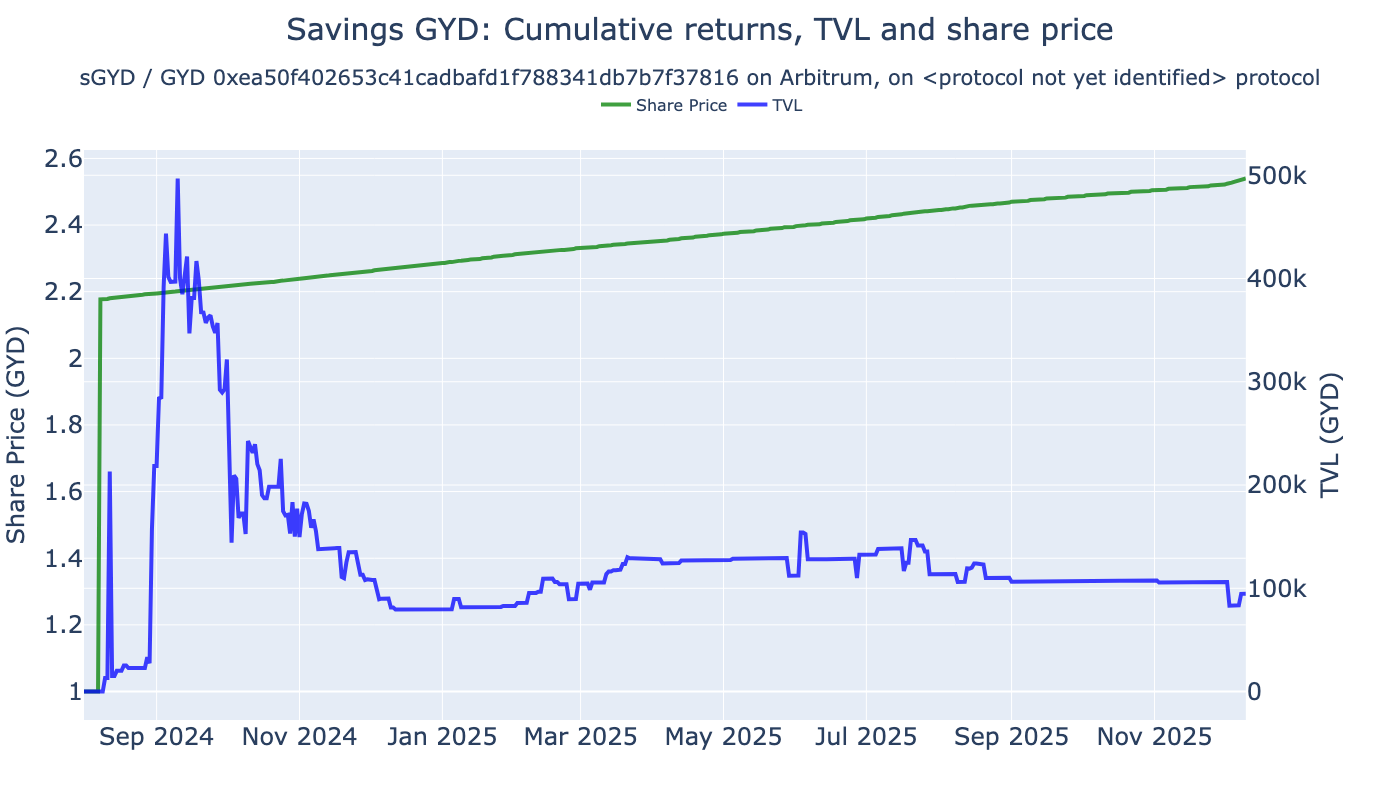

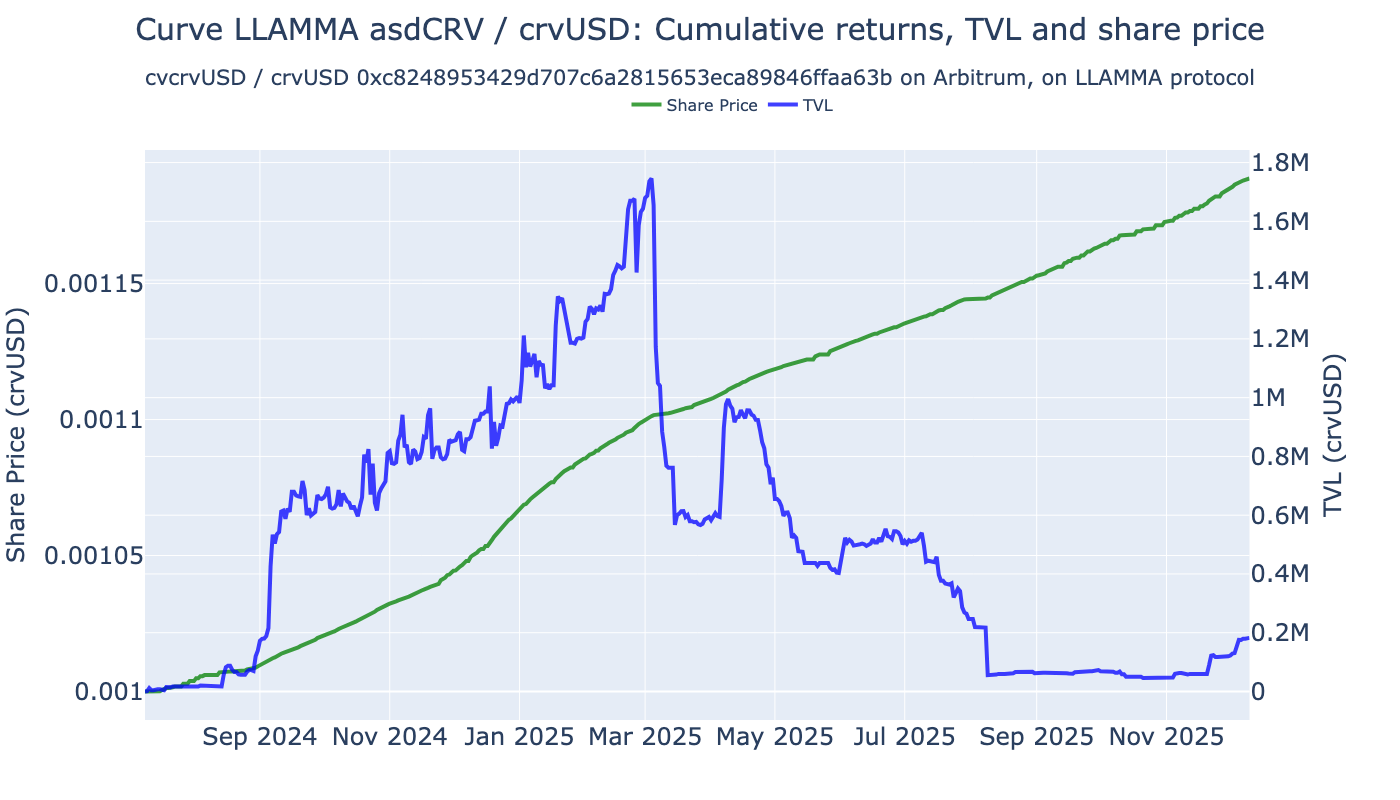

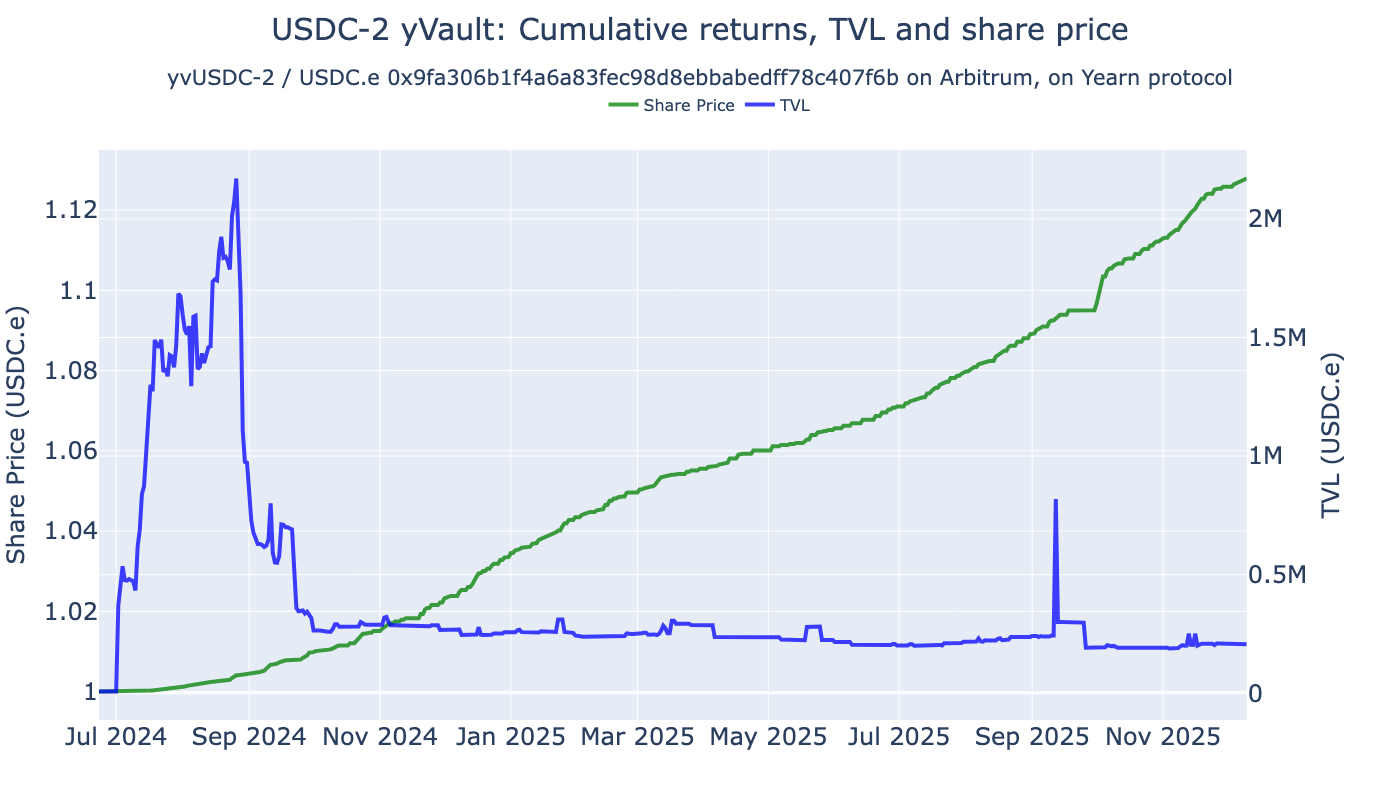

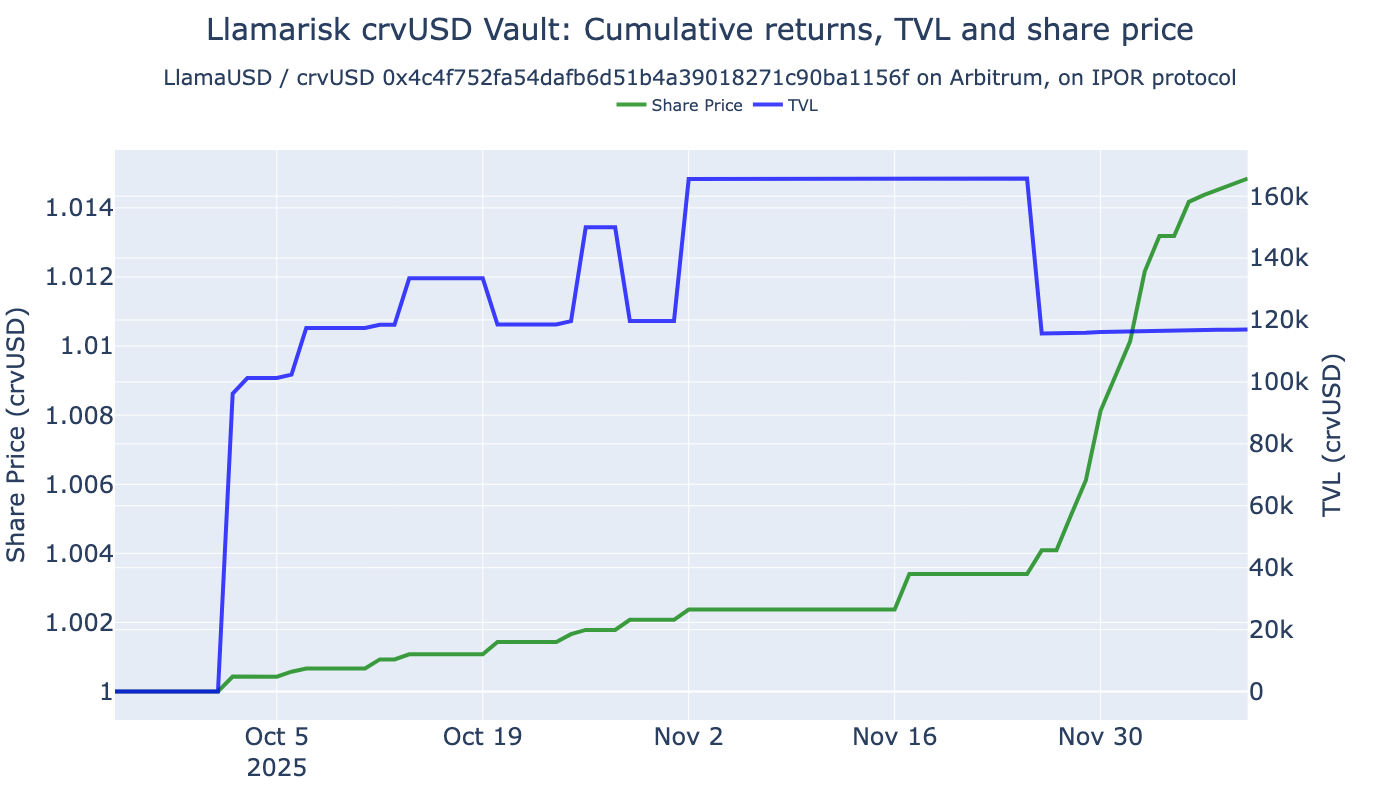

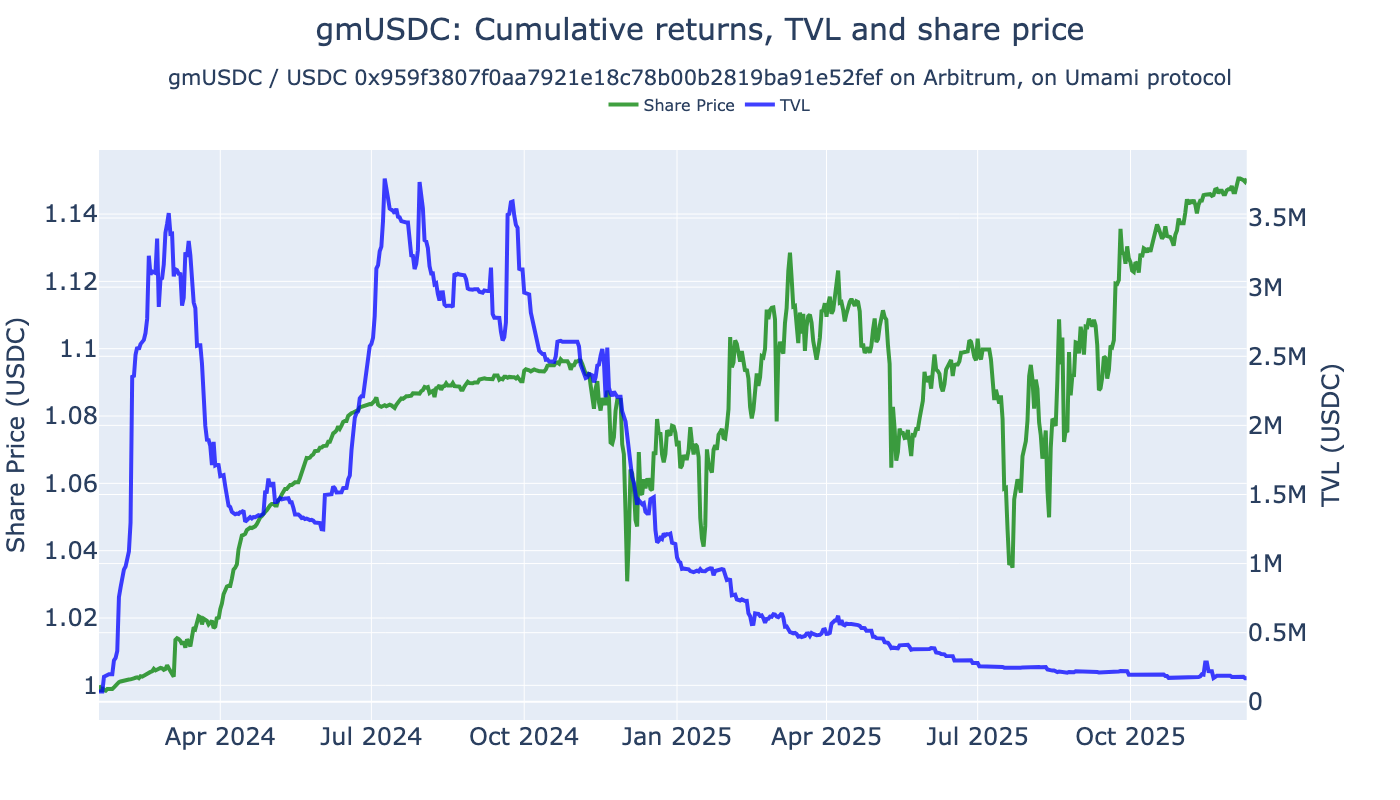

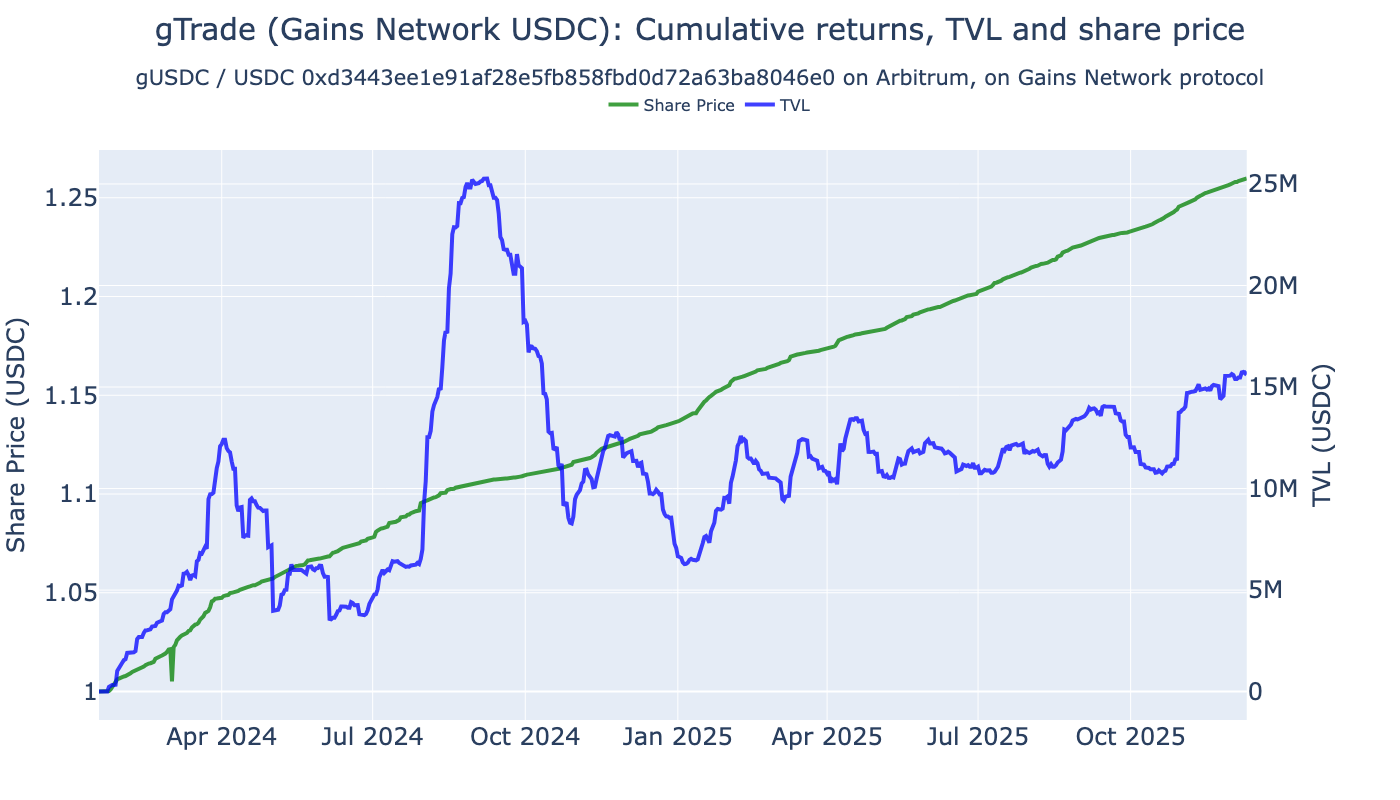

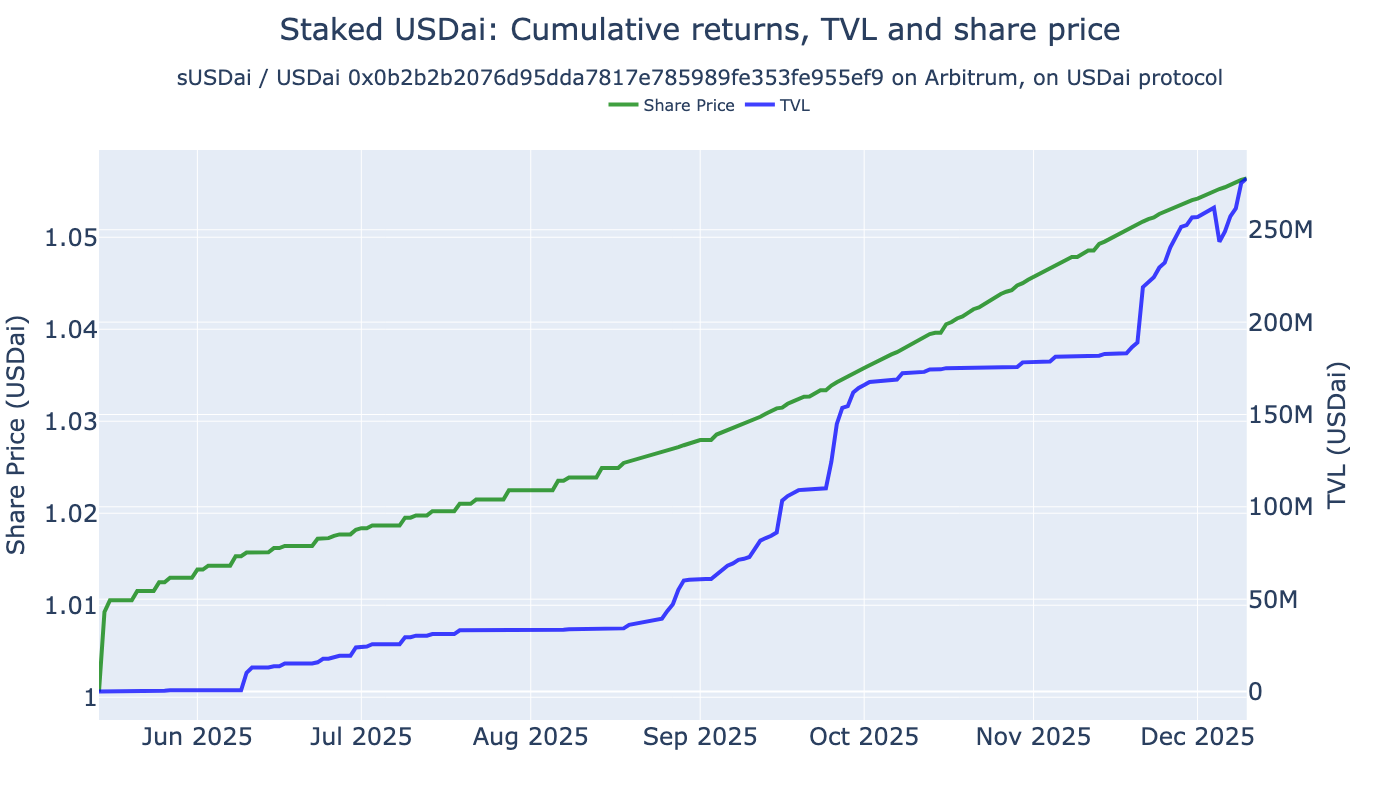

In [11]:
from eth_defi.research.vault_metrics import display_vault_chart_and_tearsheet
from eth_defi.vault.risk import VaultTechnicalRisk

examined_vaults_df = lifetime_data_filtered_df.loc[lifetime_data_filtered_df["risk"] != VaultTechnicalRisk.blacklisted]

interest_vault_specs = []

for idx, row in examined_vaults_df.head(10).iterrows():

    chain_id = row["id"].split("-")[0]
    address = row["id"].split("-")[1]
    vault_spec = VaultSpec(chain_id=int(chain_id), vault_address=address)

    # Used later
    interest_vault_specs.append(vault_spec)

    display_vault_chart_and_tearsheet(
        vault_spec,
        vault_db=vault_db,
        prices_df=prices_df,
        render=True,
    )


## Rolling returns comparison

- Show rolling returns of all picked vaults

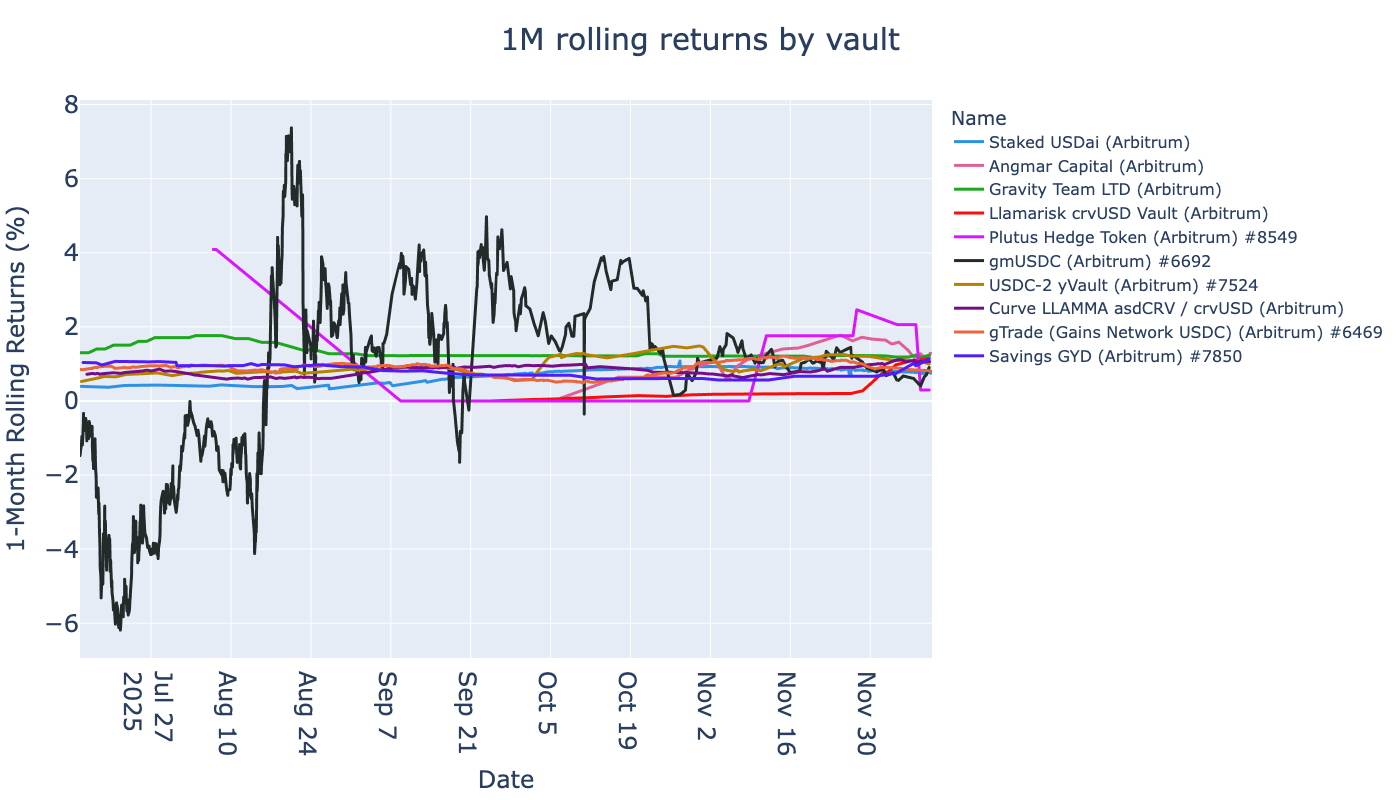

In [12]:
from eth_defi.research.rolling_returns import calculate_rolling_returns, visualise_rolling_returns

rolling_returns_df = calculate_rolling_returns(
    prices_df,
    interesting_vaults=[spec.as_string_id() for spec in interest_vault_specs],
    clip_up=100,
)

# display(rolling_returns_df.head(3))

assert len(rolling_returns_df) > 0, "No rolling returns calculated"

fig = visualise_rolling_returns(rolling_returns_df)

fig.show()

## All vaults

- List all vaults found on this chain



In [13]:
min_tvl = 1_000

lifetime_data_filtered_df = lifetime_data_df[lifetime_data_df["current_nav"] >= min_tvl]

formatted_df = format_lifetime_table(
    lifetime_data_filtered_df,
    add_index=True,
)

display(formatted_df)


Name Lifetime return abs. (net / gross)  \
#                                                                             
1                     Plutus Hedge Token                      18.3% (18.3%)   
2                         Angmar Capital                        2.6% (3.2%)   
3                       Gravity Team LTD                        --- (14.5%)   
4                            Savings GYD                       --- (154.0%)   
5           Curve LLAMMA asdCRV / crvUSD                      18.9% (18.9%)   
6                          USDC-2 yVault                      12.8% (12.8%)   
7                 Llamarisk crvUSD Vault                        1.4% (1.5%)   
8                                 gmUSDC                       9.0% (15.1%)   
9            gTrade (Gains Network USDC)                      26.0% (26.0%)   
10                          Staked USDai                        5.6% (5.6%)   
11               Yield Chasing Silo USDC                      10.5% (10.5%)   
12                        Tokemak arbUSD                        8.5% (8.5%)   
13                  Yield Chasing crvUSD                        --- (12.5%)   
14                        Hyperithm USDC                        2.1% (2.1%)   
15                  DAMM Stablecoin Fund                        1.7% (2.1%)   
16                 K3 Capital USDai USDC                        1.8% (1.8%)   
17                       Euler Theo USDC                        1.3% (1.3%)   
18             Clearstar High Yield USDC                        1.2% (1.2%)   
19                      Yearn Degen USDC                        1.8% (1.8%)   
20             Curve LLAMMA CRV / crvUSD                      23.5% (23.5%)   
21                Clearstar USDC Reactor                        2.0% (2.0%)   
22               Autopilot USDC Arbitrum                    -58.0% (-58.0%)   
23  Borrowable USDC Deposit, SiloId: 145                        2.1% (2.1%)   
24                       Euler Earn USDC                         --- (1.5%)   
25                      MEV Capital USDC                        2.6% (2.6%)   
26                            Saving USX                        --- (12.5%)   
27                    Yield Chasing USDC                        7.7% (7.7%)   
28                    Gauntlet USDC Core                        1.8% (1.8%)   
29                      Spark USDC Vault                         --- (3.6%)   
30             Euler Arbitrum Yield USDC                        1.4% (1.4%)   
31                        Dolomite: USDC                         --- (8.6%)   
32            Steakhouse High Yield USDC                        1.5% (1.5%)   
33            Revert Lend Arbitrum USDC,                        --- (12.0%)   
34             Curve LLAMMA ARB / crvUSD                        4.7% (4.7%)   
35                  Edge UltraYield USDC                        0.4% (0.4%)   
36          Harvest: USDC Vault (0xB01a)                        9.8% (9.8%)   
37                        kpk USDC Yield                        0.9% (0.9%)   
38                           Staked USDA                        --- (16.3%)   
39                        Dolomite: USDT                         --- (8.5%)   
40             Wrapped Aave Arbitrum GHO                         --- (3.1%)   
41                       Fluid Gho Token                         --- (1.3%)   
42                  Euler Arbitrum USDT0                        3.0% (3.0%)   
43                        Fluid USD Coin                         --- (9.2%)   
44            Curve LLAMMA WBTC / crvUSD                        9.3% (9.3%)   
45            Static Aave Arbitrum USDCn                        --- (10.4%)   
46           Wrapped Aave Arbitrum USDCn                         --- (3.2%)   
47                   Gauntlet USDC Prime                        1.1% (1.1%)   
48             Trust Wallet AAVE v3 USDC                         --- (5.1%)   
49      Crypto.com Defi Wallet AAVE USDC                         --- (6.2%)   
50     